In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from solver.envs.softbody.train_separately import Pick3Cube

env = Pick3Cube()

LOADING....
Loaded with 0.0007309913635253906 secs.
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[2022-09-28 18:02:13.332] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2022-09-28 18:02:13.332] [svulkan2] [warning] Continue without GLFW.


torch.Size([120, 46])


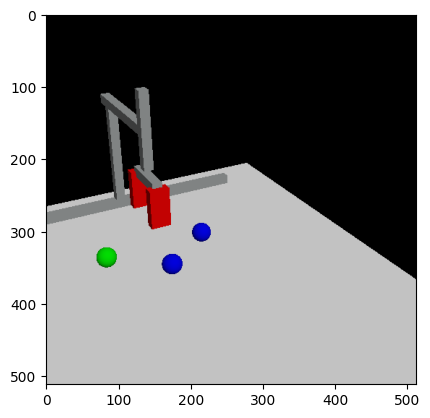

In [3]:
import torch
traj = torch.load('../exp/k/pick2/plot/traj10.th')
print(traj[0]['state'].shape)


import matplotlib.pyplot as plt
images = []
for i in traj[0]['state']:
    env.sim.set_init_state(i)
    img = env.render('rgb_array')
    plt.imshow(img)
    break
    images.append(img)

#from tools.utils import animate
#animate(images, 'vv.mp4')

In [37]:

import matplotlib.pyplot as plt
import transforms3d
import sapien.core as sapien
import numpy as np
distance = 2.2

images = []


env.sim.viewer.camera_mount_actor.set_pose(
    sapien.Pose(
        [-1.8, -2 * distance + 1.5, distance - 0.3],
        # transforms3d.euler.euler2quat(0.0, np.arctan2(2, 4), np.pi / 2)
        transforms3d.euler.euler2quat(0.0, np.arctan2(2, 4), np.pi / 2 - 0.5)
    )
)


# traj = torch.load('../exp/k/pick2/plot/traj15.th') 
traj = torch.load('../exp/k/pick2/plot_2/traj15.th')

import tqdm
start = 99

images = []
for n in tqdm.trange(10):
#for n in [8, 13, 1]:
    seq = []
    for i in traj[n]['state'][start:]:
        env.sim.set_init_state(i)
        img = env.render('rgb_array')
        seq.append(img)
    images.append(seq)

from solver.envs.softbody.plot.utils import fuse_traj_images, fuse
import matplotlib.pyplot as plt

# fuse_traj_images(images, 'grasp.mp4')
img = fuse(images, 0, 'concat')
#plt.imshow()
import cv2
cv2.imwrite('nimble_ours.png', img[:, :, ::-1])
# ours = fuse(images, 0, 'concat')
#ours = [i[0] for i in images]

100%|██████████| 10/10 [00:03<00:00,  2.66it/s]


True

100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


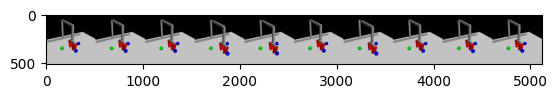

In [35]:

from solver.envs.softbody.plot.utils import fuse_traj_images, fuse
import matplotlib.pyplot as plt

traj = torch.load('../exp/k/pick2/gd/traj10.th')
images = []

for n in tqdm.trange(10):
# for n in [8, 13, 1]:
    seq = []
    for i in traj[n]['state'][start:]:
        env.sim.set_init_state(i)
        img = env.render('rgb_array')
        seq.append(img)
    images.append(seq)


import cv2
traj = fuse(images, 0, 'concat')
cv2.imwrite('nimble.png', traj[:, :, ::-1])

#plt.imshow()
#GD = fuse(images, 0, 'mean')
#plt.imshow(GD)

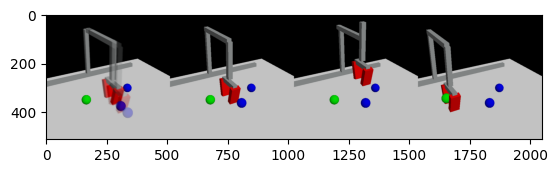

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# plt.imshow(np.concatenate((GD, ours), axis=1))
images = [GD] + list(ours)
images = [i for i in images]
plt.imshow(np.concatenate(images, axis=1))

import cv2
for idx, i in enumerate(images):
    cv2.imwrite(f'nimble{idx}.png', i[...,::-1])